# Importing analysis & visualization libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turning project folder into string path 
path = r'C:\Users\keirr\11-2020 Instacart Basket Analysis'

In [3]:
# Importing orders_products_customer.pkl dataset with path
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer.pkl'))

In [4]:
# Checking imported df
ords_prods_cust.head(5)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_of_kids,married_single,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### Considering privacy of customers, 'last_name' column should be excluded from df

In [5]:
# Creating new version of df without overriding
df = ords_prods_cust.drop(columns = ['last_name'])

In [6]:
# Checking df
df.head(2)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,gender,state,age,date_joined,num_of_kids,married_single,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Female,Alabama,31,2/17/2019,3,married,40423,both


### Due to issue with prices, adjusting col values

In [7]:
# Further exploratory analysis to check discrepency in data
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,gender,state,age,date_joined,num_of_kids,married_single,income,_merge
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequenct customer,Craig,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequenct customer,Craig,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequenct customer,Nicole,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequenct customer,Alice,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequenct customer,Catherine,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [8]:
# Subsetting to exclude any prices over $100.00
df_1 = df.loc[df['prices'] <=100]

In [9]:
# Re-checking max of 'prices' column
df_1['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

# Contents
## 1. Comparing Customer Spending Habits by Region
## 2. Removing 'Low-Activity' Customers 
## 3. Creating 'Customer Profile'
## 4. For-loop to categorize customer_profiles into age_group
## 5. loc.() function categorize customer profiles into income brackets
## 6. Distribution of Different Customer Profiles
## 7. Sampling for Visualizations

## 1. Comparing Customer Spending Habits by Region

### Separating States into Regions

In [10]:
# Printing frequency to see what States are within df
df_1['state'].value_counts()

state
Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mi

### Utilizing for-loop to assign States to new 'region' column

In [11]:
# Simplifying States into Region-based lists
north_east = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
mid_west = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
west =['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


# Creating empty list for values
results = []

# for-loop statement to categorize values
for value in df_1['state']:
    if value in (north_east):
        results.append("North East")
    elif value in (mid_west):
        results.append("Mid West")
    elif value in (west):
        results.append("West")
    else:
        results.append("South")

In [12]:
# Calling results list
results

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid W

In [13]:
# Setting results of for-loop into new column 
df_1['region'] = results

C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\1380909155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['region'] = results


In [14]:
# Checking frequency of 'region' column
df_1['region'].value_counts(dropna = False)

region
South         10790096
West           8291679
Mid West       7596065
North East     5721892
Name: count, dtype: int64

### Creating crosstab for new col 'region' and 'spending_flag'

In [15]:
# Crossing variables
crosstab = pd.crosstab(df_1['region'], df_1['spending_flag'])

In [16]:
# Calling result
crosstab

spending_flag,High spender,Low spender
region,,
Mid West,154715,7441350
North East,107381,5614511
South,207902,10582194
West,159120,8132559


### 1.South, 2. West, 3. Mid West, 4. North East; all regions follow a similar trend: Largest amount of 'Higher spender(s), but also the largest amount of 'Low spender(s).

## 2. Removing 'Low-Activity' Customers 

In [17]:
# Checking shape of df
df_1.shape

(32399732, 33)

### Grouping & aggregating data to find customers 'total_order'

In [18]:
# Splitting the data into groups based on the 'user_id' column
# Applying the transform() function on the 'order_number' column to generate the max(total) orders for each user
# Creating a new column, 'total_order' for results of agg()

df_1['total_order'] = df_1.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\3260259103.py:5: FutureWarning: The provided callable <function amax at 0x0000021F025E1BC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_1['total_order'] = df_1.groupby(['user_id'])['order_number'].transform(np.max)
C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\3260259103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['total_order'] = df_1.groupby(['user_id'])['order_number'].transform(np.max)


In [19]:
df_1.head(2)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,num_of_kids,married_single,income,_merge,region,total_order
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,10
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,10


### Utilizing .loc() function to create subset excluding customers with 'total_order' <= 5

In [20]:
df_2 = df_1.loc[df_1['total_order'] > 5]

In [21]:
# Checking shape of df_2 after excluding 'low-activity customers'
df_2.shape

(30166708, 34)

In [22]:
# Checking min of 'total_order' column to ensure 'low-activity customers' are excluded
df_2['total_order'].min()

6

### Exporting df_2 sample

In [28]:
# Exporting df_2 to pkl

df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded_new.pkl'))

## 3. Creating 'Customer Profile'

### Subset of df_2 w/ only necessary columns

In [23]:
profiling = df_2[['age', 'income', 'department_id', 'product_name', 'married_single', 'num_of_kids', 'orders_day_of_the_week']]

In [24]:
# Checking subset
profiling.head(5)

,age,income,department_id,product_name,married_single,num_of_kids,orders_day_of_the_week
0,31,40423,7,Soda,married,3,2
1,31,40423,7,Soda,married,3,3
2,31,40423,7,Soda,married,3,3
3,31,40423,7,Soda,married,3,4
4,31,40423,7,Soda,married,3,4


In [25]:
# Checking min 'age' of subset
profiling['age'].min()

18

In [26]:
# Checking max of 'age' of subset
profiling['age'].max()

81

### Filtering subset for granularity

#### 'young' subset

In [27]:
young = profiling.loc[profiling['age'] <= 29]

In [28]:
young.head(5)

,age,income,department_id,product_name,married_single,num_of_kids,orders_day_of_the_week
2226,24,55550,7,Soda,married,1,5
2227,24,55550,7,Soda,married,1,6
2228,24,55550,4,Bag of Organic Bananas,married,1,6
2229,24,55550,4,Strawberries,married,1,6
2230,24,55550,4,Celery Sticks,married,1,6


#### 'middle_aged' subset

In [29]:
middle_aged = profiling.loc[profiling['age'].isin([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])]

In [30]:
middle_aged.head(5)

,age,income,department_id,product_name,married_single,num_of_kids,orders_day_of_the_week
0,31,40423,7,Soda,married,3,2
1,31,40423,7,Soda,married,3,3
2,31,40423,7,Soda,married,3,3
3,31,40423,7,Soda,married,3,4
4,31,40423,7,Soda,married,3,4


#### 'senior' subset

In [31]:
senior = profiling.loc[profiling['age'] >= 50]

In [32]:
senior.head(5)

,age,income,department_id,product_name,married_single,num_of_kids,orders_day_of_the_week
59,69,54313,7,Soda,divorced/widowed,0,1
60,69,54313,7,Soda,divorced/widowed,0,2
61,69,54313,7,Soda,divorced/widowed,0,2
62,69,54313,7,Soda,divorced/widowed,0,1
63,69,54313,7,Soda,divorced/widowed,0,1


### Exploring desciptive statistics of each subset 

#### 'young' subset

In [33]:
young.describe()

,age,income,department_id,num_of_kids,orders_day_of_the_week
count,5.667905e+06,5.667905e+06,5.667905e+06,5.667905e+06,5.667905e+06
mean,2.349598e+01,7.070338e+04,9.941186e+00,1.501716e+00,2.742496e+00
std,3.457112e+00,2.487900e+04,6.285363e+00,1.118134e+00,2.090852e+00
min,1.800000e+01,2.593700e+04,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+01,5.624400e+04,4.000000e+00,1.000000e+00,1.000000e+00
50%,2.300000e+01,6.933800e+04,9.000000e+00,1.000000e+00,3.000000e+00
75%,2.700000e+01,8.486000e+04,1.600000e+01,3.000000e+00,5.000000e+00
max,2.900000e+01,3.963640e+05,2.100000e+01,3.000000e+00,6.000000e+00


In [34]:
# Grouping by 'married_single'
# Aggregating income to see average, min and max income of 'young' people
young.groupby('married_single').agg({'income': ['mean', 'min', 'max']})

income               
                                          mean    min     max
married_single                                               
living with parents and siblings  70919.847076  25937  396364
married                           70685.032002  26013  392552
single                            70518.304184  25979  385324

In [35]:
# Grouping by 'married_single'
# Aggregating income to see average, min and max income of 'young' people
young.groupby('married_single').agg({'num_of_kids': ['mean', 'min', 'max']})

num_of_kids        
                                        mean min max
married_single                                      
living with parents and siblings    1.986318   1   3
married                             2.005447   1   3
single                              0.000000   0   0

#### 'middle_aged' subset

In [36]:
middle_aged.describe()

,age,income,department_id,num_of_kids,orders_day_of_the_week
count,9.477589e+06,9.477589e+06,9.477589e+06,9.477589e+06,9.477589e+06
mean,3.954216e+01,9.155131e+04,9.929011e+00,1.501862e+00,2.736406e+00
std,5.797591e+00,4.192121e+04,6.283395e+00,1.117551e+00,2.086055e+00
min,3.000000e+01,2.590300e+04,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+01,6.226900e+04,4.000000e+00,1.000000e+00,1.000000e+00
50%,4.000000e+01,8.535000e+04,9.000000e+00,2.000000e+00,3.000000e+00
75%,4.500000e+01,1.134330e+05,1.600000e+01,3.000000e+00,5.000000e+00
max,4.900000e+01,5.924090e+05,2.100000e+01,3.000000e+00,6.000000e+00


In [37]:
# Grouping by 'married_single'
# Aggregating income to see average, min and max income of 'middle_aged' people
middle_aged.groupby('married_single').agg({'income': ['mean', 'min', 'max']})

income               
                        mean    min     max
married_single                             
married         91430.704916  25911  592409
single          91914.850993  25903  584097

In [38]:
# Grouping by 'married_single'
# Aggregating income to see average, min and max income of 'middle_aged' people
middle_aged.groupby('married_single').agg({'num_of_kids': ['mean', 'min', 'max']})

num_of_kids        
                      mean min max
married_single                    
married           2.000128   1   3
single            0.000000   0   0

#### 'senior' subset

In [39]:
senior.describe()

,age,income,department_id,num_of_kids,orders_day_of_the_week
count,1.502121e+07,1.502121e+07,1.502121e+07,1.502121e+07,1.502121e+07
mean,6.553630e+01,1.158820e+05,9.911860e+00,1.502192e+00,2.746085e+00
std,9.264178e+00,4.210651e+04,6.281940e+00,1.120103e+00,2.088988e+00
min,5.000000e+01,2.900100e+04,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.700000e+01,9.565400e+04,4.000000e+00,0.000000e+00,1.000000e+00
50%,6.600000e+01,1.162370e+05,9.000000e+00,2.000000e+00,3.000000e+00
75%,7.400000e+01,1.433970e+05,1.600000e+01,3.000000e+00,5.000000e+00
max,8.100000e+01,5.939010e+05,2.100000e+01,3.000000e+00,6.000000e+00


In [40]:
# Grouping by 'married_single'
# Aggregating income to see average, min and max income of 'senior' people
senior.groupby('married_single').agg({'income': ['mean', 'min', 'max']})

income               
                           mean    min     max
married_single                                
divorced/widowed  116047.856459  29011  578251
married           115811.153739  29001  593901
single            116192.322862  29251  544248

In [41]:
# Grouping by 'married_single'
# Aggregating income to see average, min and max income of 'senior' people
senior.groupby('married_single').agg({'num_of_kids': ['mean', 'min', 'max']})

num_of_kids        
                        mean min max
married_single                      
divorced/widowed    0.000000   0   0
married             2.005031   1   3
single              0.000000   0   0

### Utilizing .loc() function to profile customers in dataset

#### 'young' people

In [42]:
df_2.loc[(df_2['num_of_kids'] >= 1) & (df_2['married_single'] == 'living with parents and siblings'), 'customer_profile'] = "Teen/Young Parent"

C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\1458494994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[(df_2['num_of_kids'] >= 1) & (df_2['married_single'] == 'living with parents and siblings'), 'customer_profile'] = "Teen/Young Parent"
C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\1458494994.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Teen/Young Parent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[(df_2['num_of_kids'] >= 1) & (df_2['married_single'] == 'living with parents and siblings'), 'customer_profile'] = "Teen/Young Parent"


In [43]:
df_2.loc[(df_2['age'] <= 29) & (df_2['num_of_kids'] == 0) & (df_2['married_single'] == 'single'), 'customer_profile'] = "Single Young Adult"

In [44]:
df_2.loc[(df_2['age'] <= 29) & (df_2['num_of_kids'] >= 1) & (df_2['married_single'] == 'married'), 'customer_profile'] = "Married Young Parent"

#### 'middle_aged' people

In [45]:
df_2.loc[(df_2['age'].isin([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])) & (df_2['num_of_kids'] == 0) & (df_2['married_single'] == 'single'), 'customer_profile'] = "Single Adult"

In [46]:
df_2.loc[(df_2['age'].isin([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])) & (df_2['num_of_kids'] >= 1) & (df_2['married_single'] == 'married'), 'customer_profile'] = "Married Adult Parent"

#### 'senior' people

In [47]:
df_2.loc[(df_2['age'] >= 50) & (df_2['num_of_kids'] == 0) & (df_2['married_single'] == 'divorced/widowed'), 'customer_profile'] = "Divorced/Widowed Senior"

In [48]:
df_2.loc[(df_2['age'] >= 50) & (df_2['num_of_kids'] == 0) & (df_2['married_single'] == 'single'), 'customer_profile'] = "Single Senior"

In [49]:
df_2.loc[(df_2['age'] >= 50) & (df_2['num_of_kids'] >= 1) & (df_2['married_single'] == 'married'), 'customer_profile'] = "Married Senior Parent"

In [50]:
# Checking the frequency of 'customer_profile' column
df_2['customer_profile'].value_counts(dropna = False)

customer_profile
Married Senior Parent      11254069
Married Adult Parent        7116561
Married Young Parent        2814103
Divorced/Widowed Senior     2577446
Single Adult                2361028
Teen/Young Parent           1443901
Single Young Adult          1409901
Single Senior               1189699
Name: count, dtype: int64

## 4. For-loop to categorize customer_profiles into age_group

In [51]:
# Creating empty list for values
cust_prof = []

# for-loop statement to categorize values
for value in df_2['age']:
    if value <= 29:
        cust_prof.append("<=29")
    elif value >= 50:
        cust_prof.append("50+")
    else:
        cust_prof.append("30-49")

In [52]:
cust_prof

['30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '30-49',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '50+',
 '

In [53]:
# Setting results of for-loop into new column 
df_2['age_group'] = cust_prof

C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\667259315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['age_group'] = cust_prof


In [54]:
# Checking the frequency of 'cust_profile_id' column
df_2['age_group'].value_counts(dropna = False)

age_group
50+      15021214
30-49     9477589
<=29      5667905
Name: count, dtype: int64

## 5. loc.() function categorize customer profiles into income brackets

In [55]:
# Creating lower_income
df_2.loc[(df_2['income'] >= 25000) & (df_2['income'] <= 67000), 'income_level_flag'] = 'Lower Income'

C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\31607136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[(df_2['income'] >= 25000) & (df_2['income'] <= 67000), 'income_level_flag'] = 'Lower Income'
C:\Users\keirr\AppData\Local\Temp\ipykernel_11636\31607136.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Lower Income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[(df_2['income'] >= 25000) & (df_2['income'] <= 67000), 'income_level_flag'] = 'Lower Income'


In [56]:
# Creating mid_income
df_2.loc[(df_2['income'] >= 67001) & (df_2['income'] <= 127000), 'income_level_flag'] = 'Mid Income'

In [57]:
# Creating higher_income
df_2.loc[df_2['income'] > 127001, 'income_level_flag'] = 'Higher Income'

In [58]:
# Checking the frequency of 'cust_profile_id' column
df_2['income_level_flag'].value_counts(dropna = False)

income_level_flag
Mid Income       14994041
Higher Income     7737420
Lower Income      7435247
Name: count, dtype: int64

## 6. Distribution of different customer profile's

## Utilizing bar chart to show distribution of customer_profile 

<Axes: xlabel='customer_profile'>

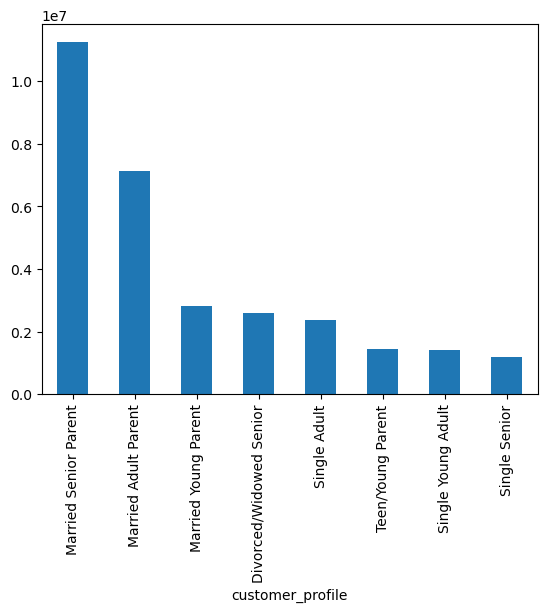

In [59]:
df_2['customer_profile'].value_counts().plot.bar()

#### Need to add some color for variation, going to color block; reds= 50+, oranges=30-49, and greens=>29

Text(0, 0.5, 'Frequency')

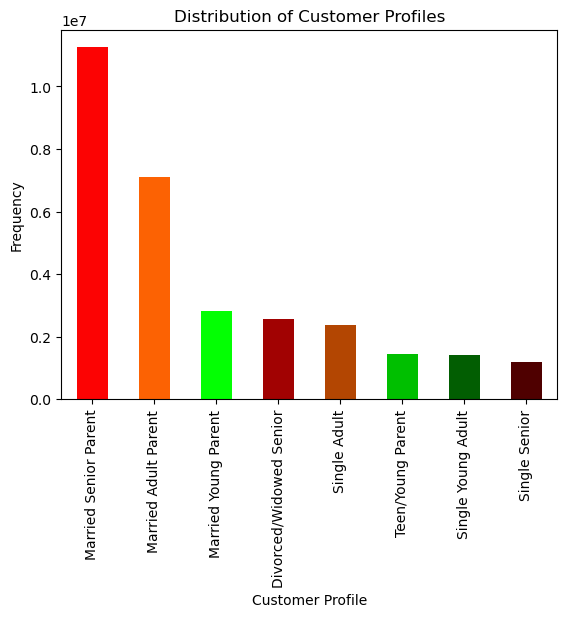

In [60]:
cust_prof = df_2['customer_profile'].value_counts().plot.bar(color =['#fc0303', '#fc6203', '#03ff03', '#a10202', '#b34602', '#00bf00', '#025e02', '#4f0000'])

# Adding Title and axis labels
plt.title("Distribution of Customer Profiles")
plt.xlabel("Customer Profile")
plt.ylabel("Frequency")

In [65]:
# Exporting cust_prof as image 
cust_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile.png'))

## 5. Groupby & Aggregate on 'customer_profile' level

### Frequency usage

In [61]:
# Grouping data by 'customer_profile', and finding mean, max, min of 'days_since_last_order' to see how often different customers order on IC
df_2.groupby('customer_profile').agg({'days_since_last_order': ['mean', 'max', 'min']})

days_since_last_order           
                                         mean   max  min
customer_profile                                        
Divorced/Widowed Senior             10.574000  30.0  0.0
Married Adult Parent                10.616759  30.0  0.0
Married Senior Parent               10.669094  30.0  0.0
Married Young Parent                10.623372  30.0  0.0
Single Adult                        10.637231  30.0  0.0
Single Senior                       10.475629  30.0  0.0
Single Young Adult                  10.744235  30.0  0.0
Teen/Young Parent                   10.579954  30.0  0.0

#### All customer-profiles submit an order (on average) every 10 days.
#### Teen/Young Parents & Divorced and Widowed Childless Seniors order slightly more frequently than other profiles
#### Single Young Adults have the longest time in between orders (10.74 days)

### Expenditure 

In [62]:
# Grouping data by 'customer_profile', and finding mean, max, min of 'prices' to see how prices of items bought differs between customers
df_2.groupby('customer_profile').agg({'prices': ['mean', 'max', 'min']})

prices           
                             mean   max  min
customer_profile                            
Divorced/Widowed Senior  7.801159  25.0  1.0
Married Adult Parent     7.792233  25.0  1.0
Married Senior Parent    7.791112  25.0  1.0
Married Young Parent     7.777687  25.0  1.0
Single Adult             7.793398  25.0  1.0
Single Senior            7.776894  25.0  1.0
Single Young Adult       7.769814  25.0  1.0
Teen/Young Parent        7.799231  25.0  1.0

#### LOWEST to LOW - Single Young Adults(<29y/o) purchase lower-priced items, followed by Childless Single Seniors(50+)
#### MID - Married Young Parents(<29y/o) purchase mid-priced items, followed by Married Senior Parents(50+), then Married Adult Parents(30-497/o)
#### HIGH to HIGHEST - Single Adults(30-49) orders most(avg) higher-priced items, followed by Teen/Young Parent(<29y/o), then Divorced/Widowed Childless Senior(<29y/o)

#### From usage frequency above, those who purchase lower priced items, tend to make purchases more often, and those who puchase higher-priced items take slighly longer between purchases

## Income levels

## 6. Comparing 'customer_profile' w/ variables

### 'income_level_flag'

In [63]:
# Crossing 'customer_profile' w/ 'region'
crosstab_income = pd.crosstab(df_2['income_level_flag'], df_2['customer_profile'])

In [64]:
crosstab_income

customer_profile,Divorced/Widowed Senior,Married Adult Parent,Married Senior Parent,Married Young Parent,Single Adult,Single Senior,Single Young Adult,Teen/Young Parent
income_level_flag,,,,,,,,
Higher Income,1013004,1318871,4417738,35017,444303,477108,13940,17439
Lower Income,318137,2186358,1451494,1302633,736370,160560,639332,640363
Mid Income,1246305,3611332,5384837,1476453,1180355,552031,756629,786099


### 'region'

In [65]:
# Crossing 'customer_profile' w/ 'region'
crosstab_2 = pd.crosstab(df_2['region'], df_2['customer_profile'])

In [66]:
crosstab_2

customer_profile,Divorced/Widowed Senior,Married Adult Parent,Married Senior Parent,Married Young Parent,Single Adult,Single Senior,Single Young Adult,Teen/Young Parent
region,,,,,,,,
Mid West,598267,1676035,2618910,657643,565971,287344,322112,342662
North East,467398,1268580,1998366,489809,395119,198152,256276,249881
South,856430,2363047,3740819,935642,802977,375922,481036,492631
West,655351,1808899,2895974,731009,596961,328281,350477,358727


#### Mid West has the highest amount of Married Senior Parents (50+) [2.6M], followed by Married Adult Parents (30-49) [1.6M], **with Married Young Parent (<29) closest in the hundred thousands

#### North East has the highest amount of Married Senior Parents (50+) [1.9M], followed by Married Adult Parents (30-49) [1.2M], ** 

#### South has the highest amount of Married Senior Parents (50+) [3.7M], followed by Married Adult Parents (30-49) [2.3M], **

#### West has the highest amount of Married Senior Parents (50+) [2.8M], followed by Married Adult Parents (30-49) [1.8M], **

### 'department_id'

In [67]:
# Crossing 'customer_profile' w/ 'department_id'
crosstab_3 = pd.crosstab(df_2['department_id'], df_2['customer_profile'])

In [68]:
crosstab_3

customer_profile,Divorced/Widowed Senior,Married Adult Parent,Married Senior Parent,Married Young Parent,Single Adult,Single Senior,Single Young Adult,Teen/Young Parent
department_id,,,,,,,,
1,178718,481599,770986,192961,159746,81672,93586,100057
2,2779,7440,12424,3300,2758,1338,1606,1770
3,93297,256371,407831,101808,86969,42978,50853,52381
4,758511,2094311,3302216,822914,697077,349571,415018,420326
5,11376,32752,50548,12735,11886,6124,6083,8069
6,21162,58808,91828,23328,19713,9777,12060,12046
7,215425,585011,944829,232076,197542,98740,117470,116148
8,7754,20226,34102,8050,7238,3447,4324,5198
9,68202,187300,298815,75013,60982,31108,37898,38365


#### department_id = 1	frozen; 2	other; 3	bakery; 4	produce; 5	alcohol; 6	international; 7	beverages; 8	pets; 9	dry goods pasta; 10	bulk; 11	personal care; 12	meat seafood; 13	pantry; 14	breakfast; 15	canned goods; 16	dairy eggs; 17	household; 18	babies; 19	snacks; 20	deli; 21	missing

#### 4(produce), 16(dairy eggs), 19(snacks) seems to be most popular overall

## 7. Visualizations 

### Due to computing limitations, created sample of df to perform visualizations in separate notebook

In [69]:
# Setting seed & creating 'dev' list for boolean values
np.random.seed(4)
dev = np.random.rand(len(df_2)) <= 0.7

In [70]:
# Checking list of boolean values
dev

array([False,  True, False, ...,  True,  True,  True])

In [71]:
# Creating 'big' and 'small' df to set values to
big = df_2[dev]
small = df_2[~dev]

In [72]:
len(df_2)

30166708

In [73]:
# Checking if 'big' and 'small' match 
len(big) + len(small)

30166708

In [74]:
# Exporting small dataset to pkl to make visuals within different kernel to hopefully save my CPU
small.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'small_sample.pkl'))